In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset and display table
combined_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "left")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_total = combined_data["Mouse ID"].count()
mice_total

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = combined_data[combined_data.duplicated(["Mouse ID",])]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
squeaky_df = combined_data.drop_duplicates ("Mouse ID")
squeaky_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
squeaky_total = squeaky_df["Mouse ID"].count()
squeaky_total

249

In [7]:
#Summary Stats

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev =  combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem =  combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_data = pd.DataFrame({'Mean':mean, 
                             'Median':median, 
                             'Variance':variance, 
                             'Standard Deviation':std_dev, 
                             'SEM': sem})
summary_data



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Bar/Pie Charts


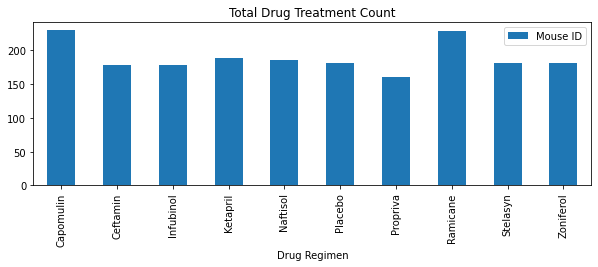

<Figure size 432x288 with 0 Axes>

In [10]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_graph = pd.DataFrame(combined_data.groupby(['Drug Regimen']).count()).reset_index()
bar_df = bar_graph[['Drug Regimen', 'Mouse ID']]
bar_df = bar_df.set_index('Drug Regimen')
bar_df.plot(kind='bar', figsize=(10,3))
plt.title('Total Drug Treatment Count')
plt.show()
plt.tight_layout()

In [11]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_list = summary_data.index.tolist()
regimen_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [17]:
#Turn total regimen count into a list
regimen_count = (combined_data.groupby(['Drug Regimen'])['Age_months'].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'count')

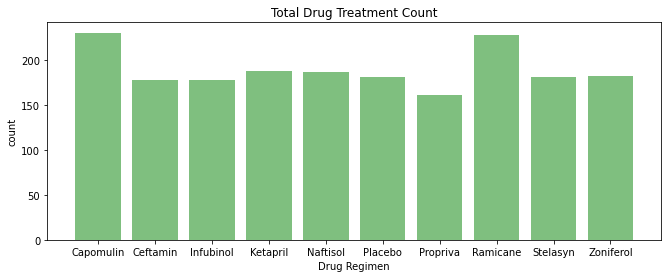

In [23]:
x_axis =np.arange(len(regimen_count))
x_axis = regimen_list
plt.figure(figsize=(11,4))
plt.bar(x_axis, regimen_count, color='g', alpha=0.5, align='center')

plt.title('Total Drug Treatment Count')
plt.xlabel('Drug Regimen')
plt.ylabel('count')



In [26]:
#Generate Male vs. Female mice pie chart using Pandas
sex_df = pd.DataFrame(combined_data.groupby(['Sex']).count()).reset_index()
sex_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [28]:
#Narrow dataframe to two columns
sex_df = sex_df[['Sex', 'Mouse ID']]
sex_df

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

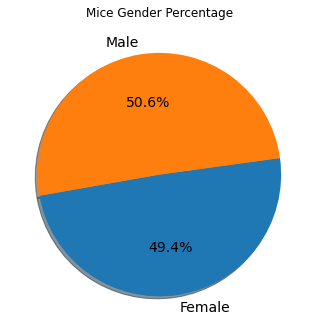

In [35]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot (121, aspect='equal')
sex_df.plot(kind = 'pie', y = 'Mouse ID', 
            ax = ax1, 
            autopct='%1.1f%%',
            startangle=190,
            shadow=True,
            labels=sex_df['Sex'],
            legend = False,
            fontsize=14)
plt.title("Mice Gender Percentage")
plt.xlabel('')
plt.ylabel('')

In [36]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = (combined_data.groupby(['Sex'])['Age_months'].count()).tolist()
sex_count

[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

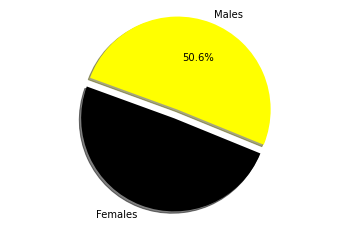

In [46]:
#pie chart details
labels = ['Females', 'Males']
colors = ['Black', 'Yellow']
explode =(0.1,0)

#create pie chart
plt.pie(sex_count, 
        explode = explode, 
        labels = labels, 
        colors = colors,
       autopct='%1.1f%%',
       shadow = True,
       startangle =160)
plt.axis('equal')

In [47]:
#Quartiles, Outliers, and Boxplots


In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin 
#Ramicane
#Infubinol
#Ceftamin
#Create a list of drugs to examine
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Edit original dataframe using the list of four drugs
final_four= combined_data[combined_data['Drug Regimen'].isin (drugs_list)]
final_four.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
#groupby 'Mouse ID ' and output 3 decimal points 
final_four_tumor = final_four.groupby(['Drug Regimen','Mouse ID']).agg(\
final_tumor_size= ('Tumor Volume (mm3)' ,lambda x: x.iloc[-1])).round(3)

final_four_tumor
                                                                

final_tumor_size
Drug Regimen Mouse ID                  
Capomulin    b128                38.983
             b742                38.940
             f966                30.486
             g288                37.074
             g316                40.159
...                                 ...
Ramicane     s508                30.276
             u196                40.668
             w678                43.166
             y449                44.183
             z578                30.639

[100 rows x 1 columns]

In [60]:
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [61]:
#Line and scatter plots

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_data.loc[combined_data['Drug Regimen']=='Capomulin']
capomulin = capomulin.reset_index()
capomulin.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [70]:
#Get data from one mouse 
capomulin_mouse = capomulin.loc[capomulin['Mouse ID']=='s185']
capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


In [90]:
#Create two columns: 'Timepoint vs. 'Tumor Volume'
capomulin_mouse = capomulin_mouse.loc[:,['Timepoint', 'Tumor Volume (mm3)']]

#Generate line plot
capomulin_mouse = capomulin_mouse.reset_index(drop=True)
capomulin_mouse.set_index('Timepoint').plot(figsize=(10,8), linewidth=2.5, color='orange')


IndexingError: Too many indexers